In [1]:
from pandas_datareader import data
import pandas as pd
import matplotlib.pyplot as plt
from datetime import date
import numpy as np
%matplotlib inline  

In [2]:
tickers = ['VCN.TO','VUN.TO','VIU.TO','VEE.TO','VAB.TO','VBU.TO','VBG.TO','ZAG.TO','XAW.TO']

In [3]:
start_date = '2017-01-01'
end_date = '2018-02-12'

In [4]:
panel_data = data.DataReader(tickers, 'yahoo', start_date, end_date)

In [5]:
close = panel_data.ix['Close']

C:\Users\scheng\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix
  """Entry point for launching an IPython kernel.


In [6]:
all_weekdays = pd.date_range(start=start_date, end=end_date, freq='B')
close = close.reindex(all_weekdays)
close = close.dropna()
close.head(10)

,VAB.TO,VBG.TO,VBU.TO,VCN.TO,VEE.TO,VIU.TO,VUN.TO,XAW.TO,ZAG.TO
2017-01-03,25.459999,26.490000,24.799999,31.150000,29.230000,24.610001,42.430000,21.900000,15.63
2017-01-04,25.440001,26.450001,24.870001,31.410000,29.240000,24.650000,42.369999,21.930000,15.68
2017-01-05,25.459999,26.530001,24.969999,31.559999,29.400000,24.790001,42.099998,21.870001,15.70
2017-01-06,25.389999,26.469999,24.889999,31.400000,29.250000,24.660000,42.240002,21.879999,15.65
2017-01-09,25.469999,26.500000,24.930000,31.180000,29.190001,24.600000,42.020000,21.809999,15.68
2017-01-10,25.469999,26.490000,24.940001,31.260000,29.400000,24.570000,42.070000,21.840000,15.69
2017-01-11,25.500000,26.530001,24.940001,31.379999,29.469999,24.570000,41.990002,21.820000,15.69
2017-01-12,25.510000,26.520000,24.950001,31.250000,29.459999,24.610001,41.779999,21.719999,15.71
2017-01-13,25.400000,26.490000,24.879999,31.379999,29.420000,24.700001,41.840000,21.809999,15.66
2017-01-16,25.410000,26.490000,24.959999,31.330000,29.469999,24.730000,42.389999,22.200001,15.69


In [7]:
close['VBAL_INDEX'] = 0.18 * close['VCN.TO'] + 0.226 * close['VUN.TO'] \
+ 0.15 * close['VIU.TO'] + 0.044 * close['VEE.TO'] \
+ 0.235 * close['VAB.TO'] + 0.072 * close['VBU.TO'] + 0.093 * close['VBG.TO']

In [8]:
close['VGRO_INDEX'] = 0.24 * close['VCN.TO'] + 0.301 * close['VUN.TO'] \
+ 0.20 * close['VIU.TO'] + 0.059 * close['VEE.TO'] \
+ 0.117 * close['VAB.TO'] + 0.036 * close['VBU.TO'] + 0.047 * close['VBG.TO']

In [20]:
close['COUCH_ASSERTIVE'] = 0.10 * close['ZAG.TO'] + 0.30 * close['VCN.TO'] \
+ 0.60 * close['XAW.TO'] 

In [21]:
def return_df(df): #enters a series
    df['VBAL_RETURN'] = np.log(df['VBAL_INDEX'] / df['VBAL_INDEX'].shift(1))
    df['VGRO_RETURN'] = np.log(df['VGRO_INDEX'] / df['VGRO_INDEX'].shift(1))
    df['COUCH_ASSERTIVE'] = np.log(df['COUCH_ASSERTIVE'] / df['COUCH_ASSERTIVE'].shift(1))
    return df

return_df(close).head(5)


,VAB.TO,VBG.TO,VBU.TO,VCN.TO,VEE.TO,VIU.TO,VUN.TO,XAW.TO,ZAG.TO,VBAL_INDEX,VGRO_INDEX,COUCH_ASSERTIVE,VBAL_RETURN,VGRO_RETURN
2017-01-03,25.459999,26.490000,24.799999,31.150000,29.230000,24.610001,42.430000,21.900000,15.63,30.406070,32.010650,NaN,NaN,NaN
2017-01-04,25.440001,26.450001,24.870001,31.410000,29.240000,24.650000,42.369999,21.930000,15.68,30.442370,32.061880,0.004191,0.001193,0.001599
2017-01-05,25.459999,26.530001,24.969999,31.559999,29.400000,24.790001,42.099998,21.870001,15.70,30.455729,32.063749,0.000455,0.000439,0.000058
2017-01-06,25.389999,26.469999,24.889999,31.400000,29.250000,24.660000,42.240002,21.879999,15.65,30.404680,32.018750,-0.001947,-0.001678,-0.001404
2017-01-09,25.469999,26.500000,24.930000,31.180000,29.190001,24.600000,42.020000,21.809999,15.68,30.328190,31.896400,-0.004364,-0.002519,-0.003829


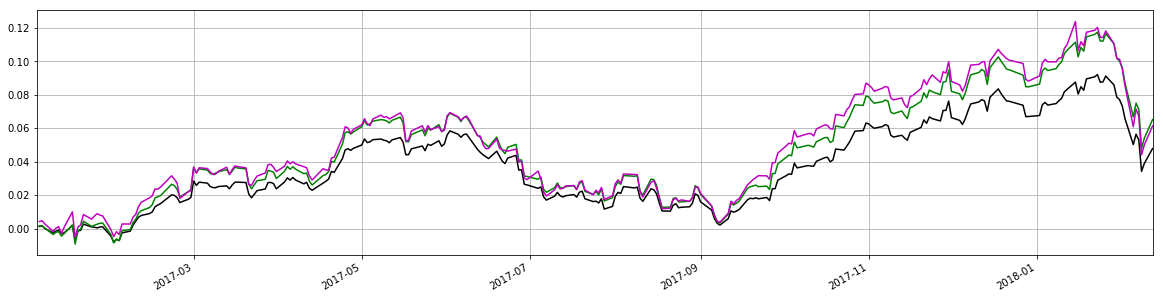

In [22]:
close['VBAL_RETURN'].cumsum().plot(grid = True, figsize = (20,5), color = 'k')
close['VGRO_RETURN'].cumsum().plot(grid = True, figsize = (20,5), color = 'g')
close['COUCH_ASSERTIVE'].cumsum().plot(grid = True, figsize = (20,5), color = 'm')
